# Тестовое задание на позицию “Аналитик данных”

### Имеется набор данных. Необходимо проанализировать его и представить ответы на вопросы с визуализацией каждого пункта.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [161]:
df = pd.read_csv("train.csv")
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860
3,909,30/12/2018,Стандарт,Владивосток,Binders,-29388.000
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,17278.944
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085


## Задание 1

###  а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [162]:
df['Sub-Category'].value_counts().sort_values(ascending=False).head(4)

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64

###  б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [163]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

filtered_df_last_2_years = df[df['Order Date'].dt.year.isin([2017, 2018])]

filtered_df_last_2_years['Sub-Category'].value_counts().sort_values(ascending=False).head(4)

Sub-Category
Binders        900
Paper          809
Furnishings    557
Phones         510
Name: count, dtype: int64

###  в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [164]:
# Фильтрация строк по годам 2017 и 2018
filtered_df_last_year = df[df['Order Date'].dt.year.isin([2018])]

# Подсчет частоты встречаемости значений в 'Sub-Category', сортировка по убыванию и выбор первых 4
filtered_df_last_year['Sub-Category'].value_counts().sort_values(ascending=False).head(4)

Sub-Category
Binders        492
Paper          452
Furnishings    310
Phones         290
Name: count, dtype: int64

## Задание 2

 ## Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

In [165]:
# Преобразование 'Sales' в числовой формат
df['Sales'] = df['Sales'].astype(str).str.replace(',', '.').astype(float)
df['Sales'] = pd.to_numeric(df['Sales'])
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,-29388.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,17278.944
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


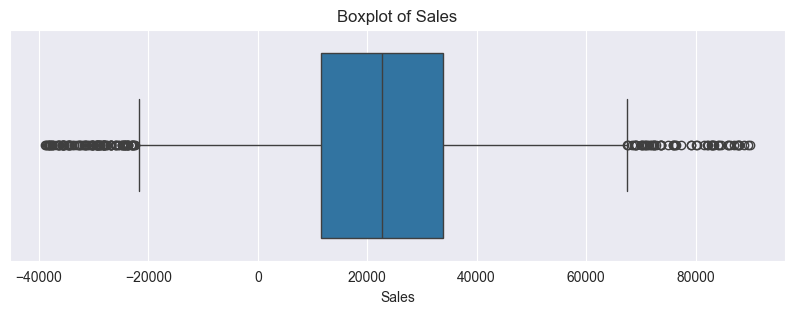

In [166]:
# Построение boxplot
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()

In [167]:
# Вычисление статистики
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()

# Определение границ для нормального распределения
lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 3 * std_sales

display(lower_bound.round(), upper_bound.round())
display(df['Sales'].max(), df['Sales'].min())

# Удаление выбросов
df_filtered = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

np.float64(-22288.0)

np.float64(67227.0)

np.float64(89916.84)

np.float64(-38855.65)

In [168]:
df_filtered

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
5,1298,2018-12-30,Стандарт,Калиниград,Binders,7366.876
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,17278.944
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


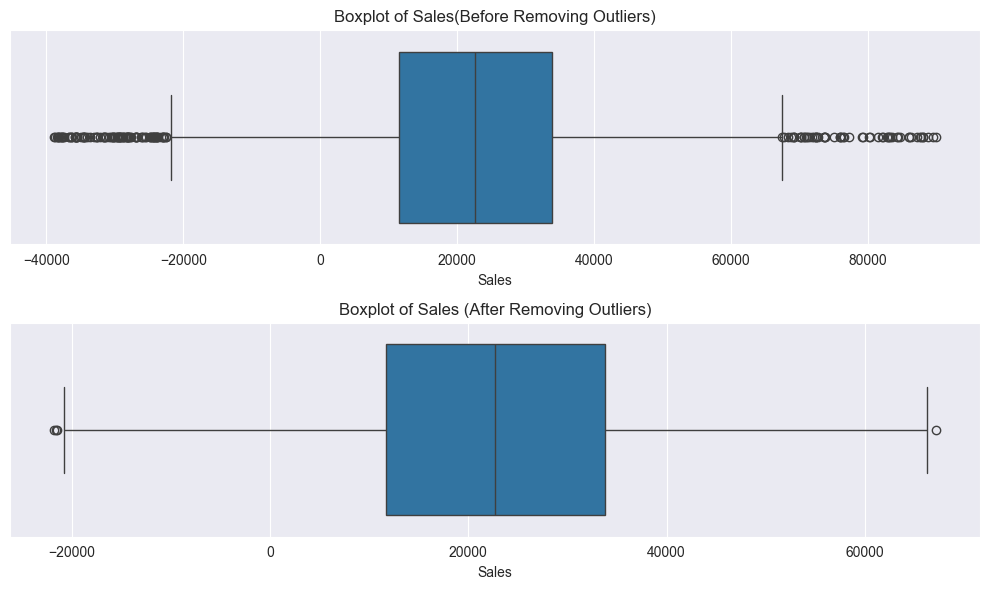

In [169]:
# Построение boxplot после удаления выбросов
plt.figure(figsize=(10, 6))

plt.subplot(2,1,1)
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales(Before Removing Outliers)')
plt.xlabel('Sales')

plt.subplot(2,1,2)
sns.boxplot(x=df_filtered['Sales'])
plt.title('Boxplot of Sales (After Removing Outliers)')
plt.xlabel('Sales')
plt.tight_layout()

## Задание 3

## Для этого задания необходимо разбить все покупки на n-нное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [170]:
bins = np.linspace(df_filtered['Sales'].min(), df_filtered['Sales'].max(), 4)
labels = ['Low', 'Medium', 'High']
df_filtered['Sale_group'] = pd.cut(df_filtered['Sales'], bins=bins, labels=labels)

In [171]:
grouped_df = df_filtered.groupby(['Region', 'Sale_group'])['Sales'].sum().reset_index()
grouped_df

,Region,Sale_group,Sales
0,Владивосток,Low,1.548351e+06
1,Владивосток,Medium,4.111423e+07
2,Владивосток,High,1.982233e+07
3,Калиниград,Low,1.562108e+06
4,Калиниград,Medium,4.731381e+07
5,Калиниград,High,2.090657e+07
6,Москва,Low,8.765556e+05
7,Москва,Medium,2.362419e+07
8,Москва,High,1.143538e+07
9,Урал,Low,1.252957e+06


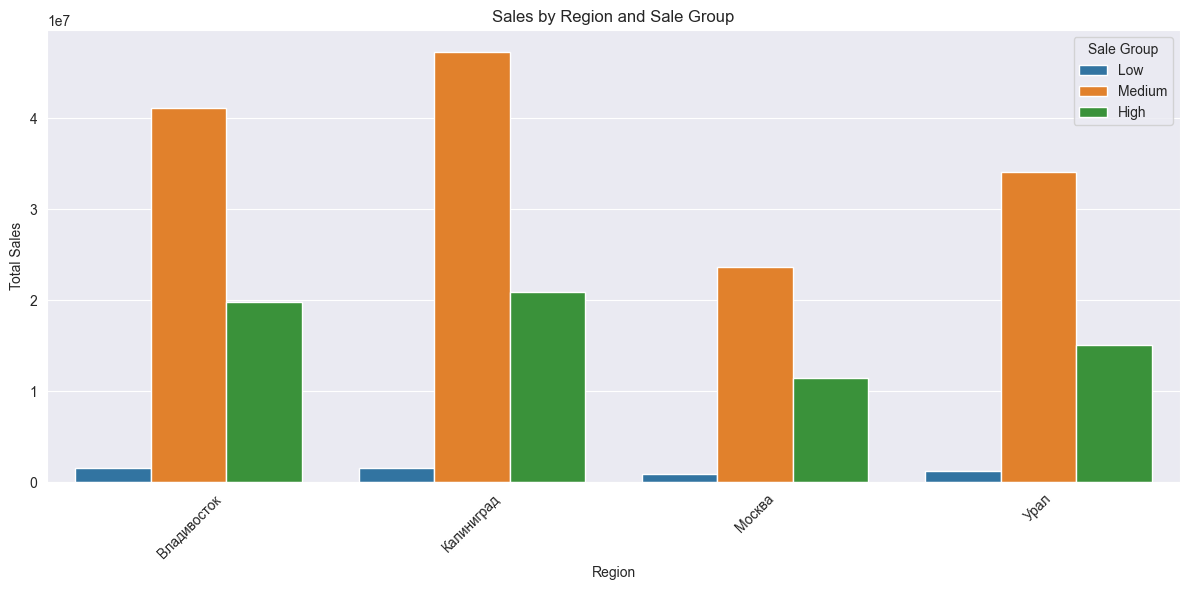

In [172]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', hue='Sale_group', data=grouped_df)
plt.title('Sales by Region and Sale Group')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Sale Group')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [173]:
total_sales_by_group = grouped_df.groupby('Sale_group')['Sales'].sum()
most_profitable_group = total_sales_by_group.idxmax()
most_profitable_group

'Medium'

In [174]:
most_profitable = grouped_df[grouped_df['Sale_group'] == most_profitable_group]
most_profitable

,Region,Sale_group,Sales
1,Владивосток,Medium,4.111423e+07
4,Калиниград,Medium,4.731381e+07
7,Москва,Medium,2.362419e+07
10,Урал,Medium,3.413199e+07
